In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats

In [2]:
#1. Is the something that would make a student in the second floor different to those in the first floor?
    # grades = means, means test opposed to corr, students = subset, all students = population, sub v pop = 1 sample, no direct diff: two tail, two tail one ttest
#2. Is there a height difference between adults who drink milk or not?
    # two sub groups, no overlap == two samples, one tail test, independent
#3. Between Texas and Mexico, who has cheeper gas?
    #ontail, asking if its higher to one state, two sample
#4. From the given departments, which one has a higher stress level?
    #means in 3 goups, nnon diretional, use two tests

In [3]:
sale1 = stats.norm(90,15).rvs(40)

sale1 = stats.norm(100,20).rvs(40)

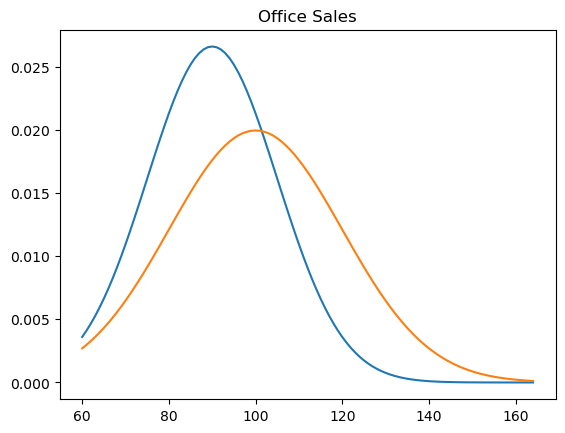

In [4]:
x = np.arange(60,165)
y=stats.norm(90,15).pdf(x)
y2=stats.norm(100,20).pdf(x)
plt.plot(x,y)
plt.plot(x,y2)
plt.title('Office Sales')
plt.show()

In [5]:
#H0:No difference between office 1 and 2
#Ha:Sale time between office one and two
#two tail test, two sample test

In [6]:
sale1mean=90
sale1stdv=15
sale2mean=100
sale2stdv=20

In [7]:
t_stat,p_val = stats.ttest_ind_from_stats(
    mean1=sale1mean,
    std1=sale1stdv,
    nobs1=40,
    mean2=sale2mean,
    std2=sale2stdv,
    nobs2=50)

In [8]:
α=.05

In [9]:
if p_val < α:
    print('reject hypothesis')
else:
    print('reject hypothesis failed')

reject hypothesis


In [10]:
mpg = data('mpg')

In [11]:
mpg['fe']=stats.hmean((mpg['hwy'],mpg['cty']))

In [12]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


In [13]:
#h0:there is no difference
#ha:there is a difference

In [14]:
fe1999=mpg[mpg.year==1999].fe
fe2008=mpg[mpg.year==2008].fe

(array([23., 24., 17., 31., 12.,  5.,  2.,  0.,  1.,  2.]),
 array([12.69230769, 15.3218111 , 17.95131451, 20.58081792, 23.21032132,
        25.83982473, 28.46932814, 31.09883155, 33.72833496, 36.35783836,
        38.98734177]),
 <BarContainer object of 10 artists>)

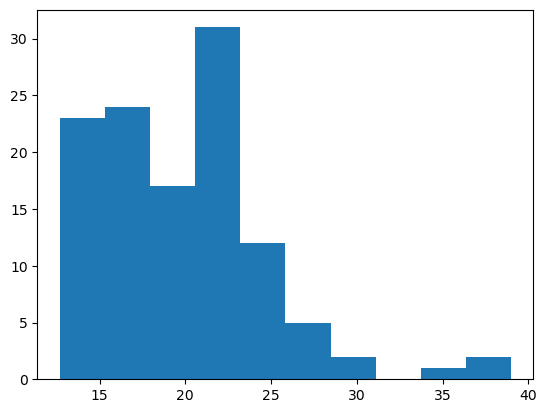

In [15]:
plt.hist(fe1999)

(array([ 7., 10., 25., 12., 16., 19., 20.,  3.,  3.,  2.]),
 array([10.28571429, 12.44483516, 14.60395604, 16.76307692, 18.9221978 ,
        21.08131868, 23.24043956, 25.39956044, 27.55868132, 29.7178022 ,
        31.87692308]),
 <BarContainer object of 10 artists>)

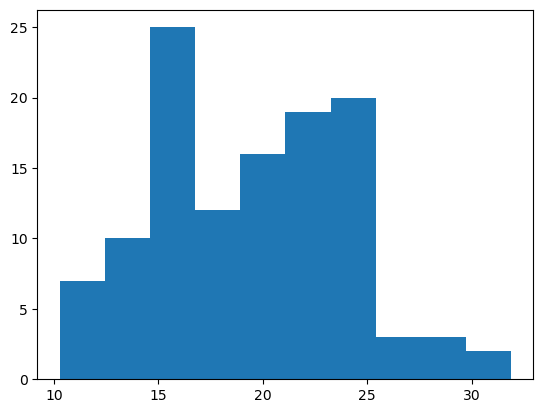

In [16]:
plt.hist(fe2008)

In [17]:
stat, p_val =stats.levene(fe1999,fe2008)
p_val < α

False

In [18]:
t_stat,p_val = stats.ttest_ind(fe1999,fe2008)
p_val < α

False

In [19]:
# Uncertain difference between the two.

In [20]:
#h0:compact cars have a lower or equal fuel efficiancy to other cars
#ha:compact have better fuel effeciancy

In [21]:
μth = mpg.fe.mean()

In [22]:
t_stat,p_val = stats.ttest_1samp(
    mpg[mpg['class']=='compact'].fe,
    μth)

In [23]:
if (p_val/2)<α and (t_stat>0):
    print('reject hypothesis')
else:
    print('reject hypothesis failed')

reject hypothesis


In [24]:
#uncertain between the two

In [25]:
#h0: manual are no better than automatic in gas
#ha:manual cats are better than automatic in gas

In [26]:
manual = mpg[mpg.trans.str.startswith('man')].fe
auto = mpg[mpg.trans.str.startswith('auto')].fe

In [27]:
stats.levene(manual,auto)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [28]:
t_stat,p_val = stats.ttest_ind(manual,auto)

In [29]:
p_val

5.510464610044009e-06

In [30]:
t_stat

4.652577547151351

In [31]:
# we reject h0

In [32]:
#1. Is there a relationship between the length of your arm and the length of your foot?
#continuous= arm and foot. pearson r corelation
#2. Do guys and gals quit their jobs at the same rate?
#catagory= the guys and gals. chi^2
#3. Does the length of time of the lecture correlate with a students grade?
#pearson r= the lecture. subset = time. one test

In [72]:
churn = pd.read_csv('telco_churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
churn.tenure.head(), churn.MonthlyCharges.head(), churn.Churn.head()

(0     1
 1    34
 2     2
 3    45
 4     2
 Name: tenure, dtype: int64,
 0    29.85
 1    56.95
 2    53.85
 3    42.30
 4    70.70
 Name: MonthlyCharges, dtype: float64,
 0     No
 1     No
 2    Yes
 3     No
 4    Yes
 Name: Churn, dtype: object)

In [66]:
#no relationship with tenure and monthly charges
#This is something with tenure and monthly


In [70]:
α=.05
r,p=stats.pearsonr(churn.tenure,churn.MonthlyCharges)
if p<α:
    print('Reject')

Reject


In [ ]:
#no relationship with tenure and total charges
#This is something with tenure and total

In [74]:
r,p=stats.pearsonr(churn.tenure,
                   churn.TotalCharges)
if p<α:
    print('Reject')

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U5')) -> None

In [77]:
import itertools
internet = churn.InternetService.unique()
phone = churn.PhoneService.unique()

In [78]:
list(itertools.product(internet,phone))

[('DSL', 'No'),
 ('DSL', 'Yes'),
 ('Fiber optic', 'No'),
 ('Fiber optic', 'Yes'),
 ('No', 'No'),
 ('No', 'Yes')]

In [81]:
churn[(churn["InternetService"]=='DS'&churn["PhoneService"]=='No')]

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [38]:
# Information neither disproves nor comfirms anything about controlling phone and internet

In [39]:
from env import user
from env import password
from env import host

In [40]:
def get_db_url(db,user=user,password=password,host=host):
     return (f'mysql+pymysql://{user}:{password}@{host}/{db}')

In [41]:
sql = get_db_url('employees')

In [42]:
emp = pd.read_sql('Select * from employees join salaries using (emp_no)',sql)

In [49]:
emp.head(15)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25
5,10001,1953-09-02,Georgi,Facello,M,1986-06-26,71046,1991-06-25,1992-06-24
6,10001,1953-09-02,Georgi,Facello,M,1986-06-26,74333,1992-06-24,1993-06-24
7,10001,1953-09-02,Georgi,Facello,M,1986-06-26,75286,1993-06-24,1994-06-24
8,10001,1953-09-02,Georgi,Facello,M,1986-06-26,75994,1994-06-24,1995-06-24
9,10001,1953-09-02,Georgi,Facello,M,1986-06-26,76884,1995-06-24,1996-06-23


In [45]:
#Pay remains the same regardless
#Pay increases the longer one works 

In [50]:
# No conclusive evidence that there is anything making more titles will change how employees work.
# There is a relationship between tenure and titles.

In [55]:
from pydataset import data

In [83]:
data('sleepstudy')

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [ ]:
#There is no corelation between days and reaction
#There is something between days and reaction

In [58]:
#Students get destracted and do not impove on test scores
#ttest

In [59]:
#The evidence of one devloping lung cancer from smoking is unclear
#chi^2

In [60]:
#There is no evidence that gender determines blood type
#chi^2

In [61]:
#The fertilizer shows little to no changes in the growth of all of the crops
#ttest

In [63]:
#There is no conclusive evidence if having a dog or a cat will impact on how one will live in an apartment
#chi^2

In [ ]:
#This is not evidence for having a mac is a codeup student
#This is evidence for having a mac makes you a codeup student

In [65]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


In [85]:
observed=pd.crosstab(mpg.drv,mpg.year)

In [86]:
#Drive and year are independant
#Drive and year have dependancy

In [87]:
chi2,p,_,expected = stats.chi2_contingency(observed)
if p<α:
    print('reject')
else:
    print('Failed')

Failed


In [ ]:
#There is no difference between gender and managers
#there us a difference between gender and managers